Saving 4. Predict Heart Disease.csv to 4. Predict Heart Disease (2).csv

📂 Uploaded file: 4. Predict Heart Disease (2).csv

🔍 First 5 Rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  

🧼 Checking for missing values...
✅ No missing values!

📊 Dataset shape: (303, 14)
🧠 Target distribution (0 = No Disease, 1 = Disease):
target
0    164
1    139
Name: count, dtype: int64


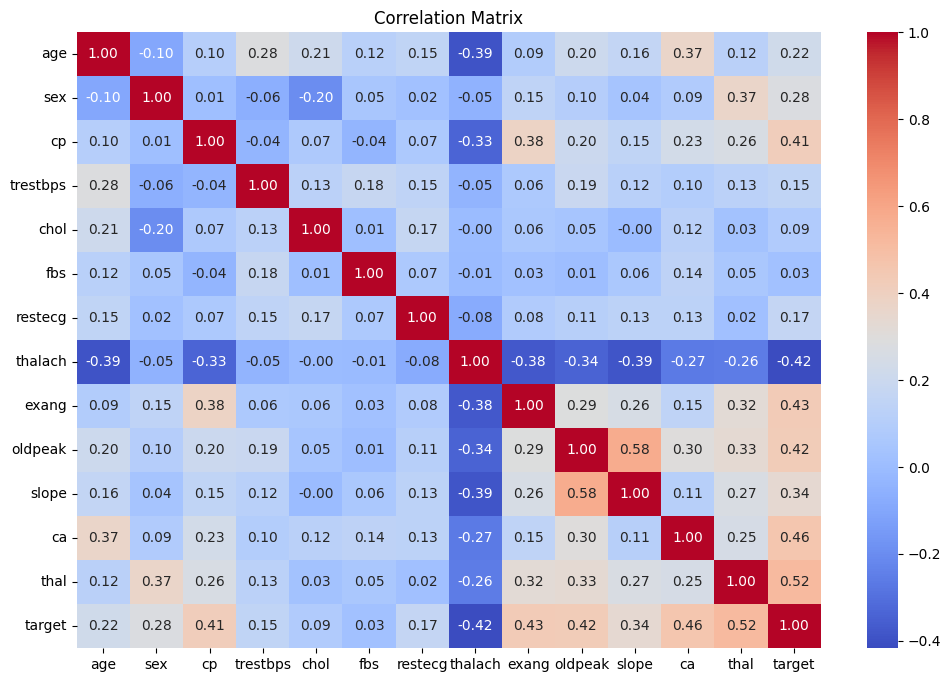


📌 Training and Evaluating: Logistic Regression
✅ Accuracy: 0.885
📈 ROC AUC Score: 0.921
📊 Confusion Matrix:
 [[25  4]
 [ 3 29]]
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


📌 Training and Evaluating: Random Forest
✅ Accuracy: 0.869
📈 ROC AUC Score: 0.93
📊 Confusion Matrix:
 [[26  3]
 [ 5 27]]
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



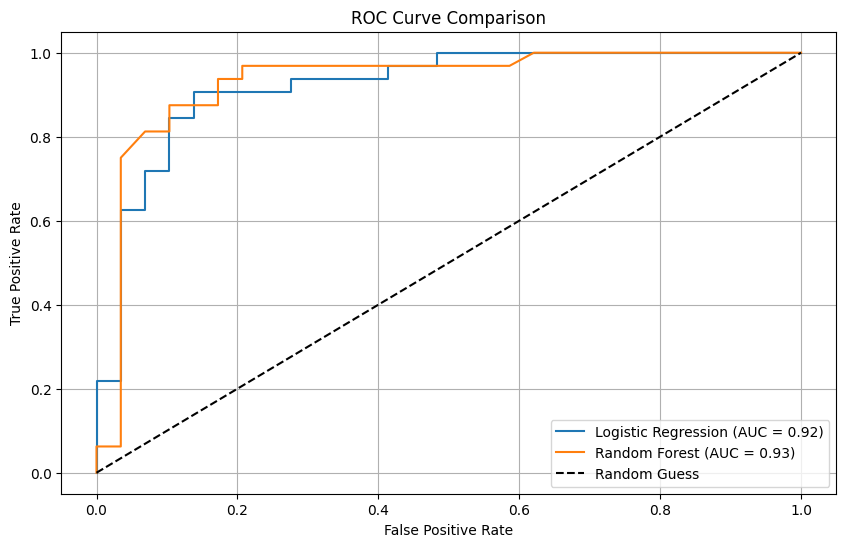

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


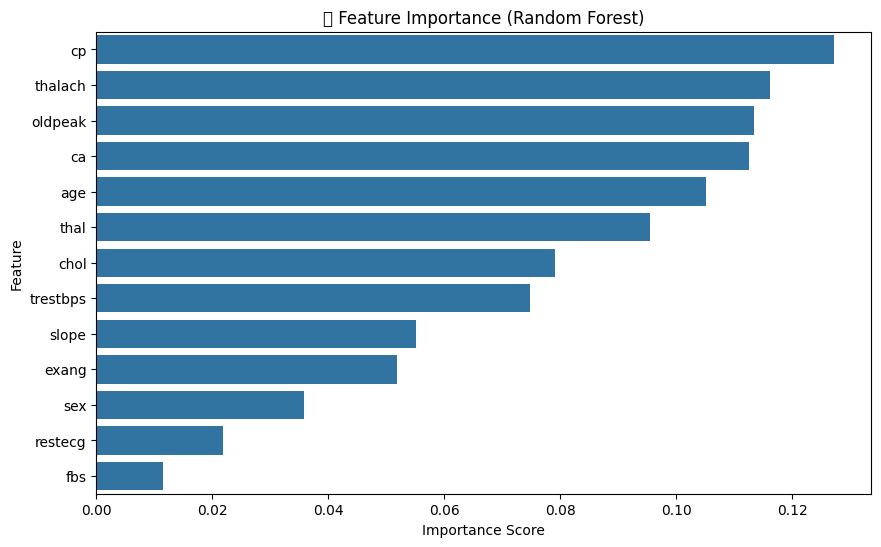

In [3]:
# 📁 Upload Section
# Allows user to upload dataset from local machine to Colab
from google.colab import files
import io

uploaded = files.upload()  # Triggers upload prompt
filename = next(iter(uploaded))  # Extract filename
print(f"\n📂 Uploaded file: {filename}")

# 🧰 Import Required Libraries
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import seaborn as sns  # Data visualization
import matplotlib.pyplot as plt  # Plotting library

# Sklearn modules for ML pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
)

# 📊 Load Dataset
df = pd.read_csv(io.BytesIO(uploaded[filename]))  # Read CSV into DataFrame
print("\n🔍 First 5 Rows:")
print(df.head())  # Display first few rows to get a glimpse of the data

# 🧼 Data Cleaning - Check for Null Values
print("\n🧼 Checking for missing values...")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.any() else "✅ No missing values!")

# 📏 Quick Info About Dataset
print("\n📊 Dataset shape:", df.shape)
print("🧠 Target distribution (0 = No Disease, 1 = Disease):")
print(df['target'].value_counts())

# 📌 Correlation Heatmap (Optional but insightful)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 🧮 Feature Matrix (X) and Target Vector (y)
X = df.drop('target', axis=1)
y = df['target']

# 📏 Normalize Features (Important for models like Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔀 Split Dataset into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 🧠 Initialize ML Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
}

# 🗂️ Dictionary to Store Results
results = {}

# 🔁 Train & Evaluate Models
for name, model in models.items():
    print(f"\n📌 Training and Evaluating: {name}")

    # Train model
    model.fit(X_train, y_train)

    # Predict on test data
    preds = model.predict(X_test)

    # Evaluate performance
    acc = accuracy_score(y_test, preds)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

    # Print metrics
    print("✅ Accuracy:", round(acc, 3))
    print("📈 ROC AUC Score:", round(auc, 3))
    print("📊 Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("📋 Classification Report:\n", classification_report(y_test, preds))

    # Store results
    results[name] = {"model": model, "accuracy": acc, "auc": auc}

# 📉 Plot ROC Curves for Comparison
plt.figure(figsize=(10, 6))
for name, data in results.items():
    model = data["model"]
    y_prob = model.predict_proba(X_test)[:,1]  # Get prediction probabilities
    fpr, tpr, _ = roc_curve(y_test, y_prob)  # Calculate ROC curve

    plt.plot(fpr, tpr, label=f"{name} (AUC = {data['auc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")  # Diagonal line for reference
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# 🌟 Feature Importance for Random Forest
rf_model = results["Random Forest"]["model"]
importances = rf_model.feature_importances_  # Get importance scores
features = X.columns
sorted_idx = np.argsort(importances)[::-1]  # Sort features by importance

# 📊 Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=features[sorted_idx])
plt.title("🔍 Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
